## Problem 1: Visualise data in a static map (10 points)


Create a *static* **thematic map** using the skills you learnt during lesson 5. The map should <br>
contain more than one layer (from at least two different data sets). Pay attention to classification <br>
and visualisation (appropriate colour scheme choice, etc.). Write your code in this notebook, and <br>
store the resulting maps in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder.

### Topic of the map

- Use any of the data sets we have used during the course (travel time data, population grid), or <br>
  any other data set of your interest (for example, [open data sets from Statistics Finland](https://www.stat.fi/org/avoindata/index_en.html), <br>
  or the open geo-data from [the Helsinki Region Infoshare](https://hri.fi/en)). If you download <br>
  data sets, add, commit, and push them to the `DATA_DIRECTORY`. Be sure to include an attribution <br>
  to each data set in your output map!
- Feel free to start from and adapt examples from the course material! You can take one step further <br>
  and add additional analysis to, e.g., the shopping centre dominance or the population within vincinity <br>
  of certain addresses)

### Criteria

- The map has more than one data layer (for instance, the results of an analysis, and the road network <br>
  to illustrate a complex spatial pattern). If (and only if) you think it adds additional value, feel <br>
  free to add a base map (but a base map does not count as an own layer) (2 points)
- The map portrays the output of an analysis or a classification that adds value beyond just displaying <br>
  the raw data (3 points)
- The map follows good cartographic practices (appropriate map extent and zoom level, colour scheme, <br>
  legend and data sources, etc.) (5 points)

### Output

- Save the map(s) in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder, remember to add, commit, <br>
  and push them to the GitHub repository
- Remember to also add, commit, and push input data sets and code

---

In [2]:
%pip install pathlib
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/e3/23/00912e3236306ec52a06f95a08918cbb54f900419951726a20a8783a8507/geopandas-0.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/b1/c2/742eb2b16931754a910abead65bfd343b70048d691b35ee19ec94f66540e/fiona-1.9.5-cp310-cp310-manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.8 MB/s eta 0:00:00
  Obtaining dependency information for pandas>=1.4.0 from https://files.pythonhosted.org/packages/b3/b3/3102c3a4abca1093e50cfec2213102a1c65c0b318a4431395d0121e6e690/pandas-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/f6/2b/b60cf73b0720abca313bfffef34e34f7f7dae23852b2853cf0368d49426b/pyproj-3.6.1-cp3

In [4]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"
OUTPUT_DIRECTORY = NOTEBOOK_PATH / "docs"

In [2]:
# ADD YOUR OWN CODE HERE

In [5]:
#read layers

#import travel data
import geopandas

travel_data = geopandas.read_file(
    DATA_DIRECTORY
    / "travel_data.gpkg"
)

In [7]:
#import helsinki road network
roads = geopandas.read_file(
    DATA_DIRECTORY
    / "Hki_liikennevaylat.shp"
)


In [9]:
#check crs
travel_data.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
roads.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
#convert crs
roads = roads.to_crs(travel_data.crs)

In [14]:
travel_data.head()

,index7,YKR_ID,to_id_jumbo,pt_r_t_jumbo,car_r_t_jumbo,to_id_dixi,pt_r_t_dixi,car_r_t_dixi,to_id,pt_r_t_myyrmanni,...,to_id_iso_omena,pt_r_t_iso_omena,car_r_t_iso_omena,to_id_ruoholahti,pt_r_t_ruoholahti,car_r_t_ruoholahti,minvalue,min_name,mall,geometry
0,5785640,5785640,5878070,101.0,39.0,5878087,102.0,45.0,5902043,90.0,...,5978593,141.0,56.0,5980260,118.0,56.0,39.0,car_r_t_jumbo,Jumbo,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,5785641,5785641,5878070,108.0,39.0,5878087,109.0,45.0,5902043,93.0,...,5978593,143.0,56.0,5980260,121.0,56.0,39.0,car_r_t_jumbo,Jumbo,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,5785642,5785642,5878070,109.0,45.0,5878087,111.0,52.0,5902043,95.0,...,5978593,145.0,64.0,5980260,123.0,63.0,45.0,car_r_t_jumbo,Jumbo,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,5785643,5785643,5878070,114.0,46.0,5878087,115.0,48.0,5902043,99.0,...,5978593,149.0,67.0,5980260,127.0,67.0,46.0,car_r_t_jumbo,Jumbo,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,5787544,5787544,5878070,98.0,38.0,5878087,99.0,44.0,5902043,83.0,...,5978593,134.0,55.0,5980260,111.0,55.0,38.0,car_r_t_jumbo,Jumbo,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [16]:
%pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/19/e5/a4ea514515f270224435c69359abb7a3d152ed31b9ee3ba5e63017461945/matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/58/56/e2c43dcfa1f9c7db4d5e3d6f5134b24ed953f4e2133a4b12f0062148db58/contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/e8/68/af41b7cfd35c7418e17b6a43bb106be4b0f0e5feb405a88dee29b186f2a7/fonttools-4.47.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

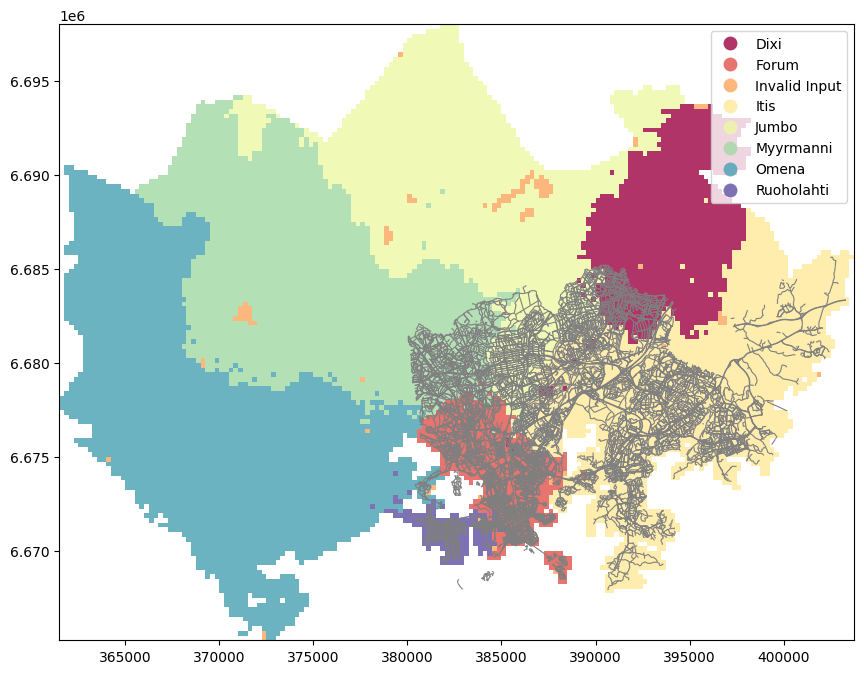

In [40]:
#plot map
import matplotlib

ax = travel_data.plot(
    figsize=(12, 8),

    column="mall",
    cmap="Spectral",
    linewidth=0,
    alpha=0.8,
    
    legend=True
)

roads.plot(
    ax=ax,
    color="grey",
    linewidth=0.8
)

minx, miny, maxx, maxy = travel_data.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

matplotlib.pyplot.savefig(DATA_DIRECTORY/"closest_shopping_mall.png")